## Multiple Linear Regression_mine_22_09_21

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe() #mean ile std arasında fark çoksa outlierdan şüphelenst.deviation mean'den büyükse outlier sorunu olabilir,
#25 ile min veya 75 ile max. arasında ciddi bir fark varsa outlier üzerinde durulmalı.
#değerlerim line etrafında bir sarmaşık gibi dolanmışsa burda normal dağılım var diyebiliriz. ama bir tarafta sapma (line'dan uzaklaşma) varsa normal dağılımdan uzaklaşmış demektir.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
import scipy.stats as stats

In [8]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

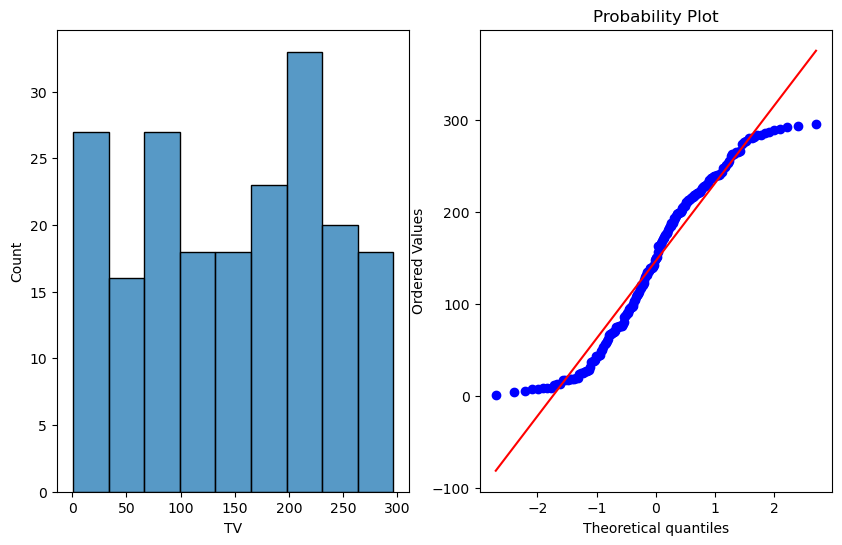

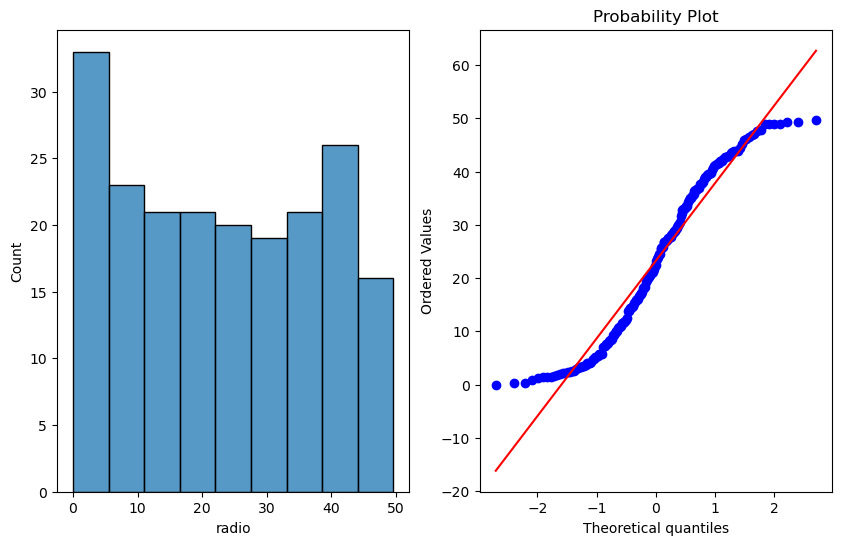

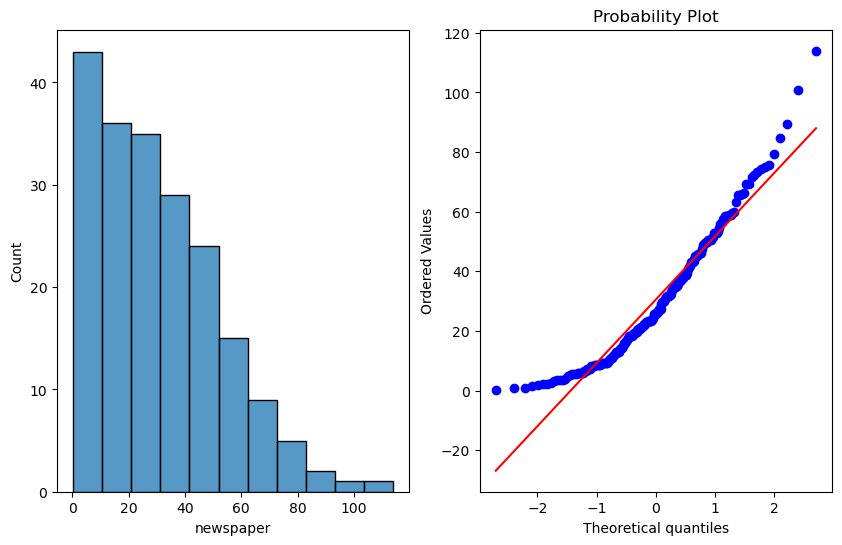

In [9]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

In [11]:
from scipy.stats import skew
for i in df.drop(columns="sales").columns:
    print(i, skew(df[i]))


TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


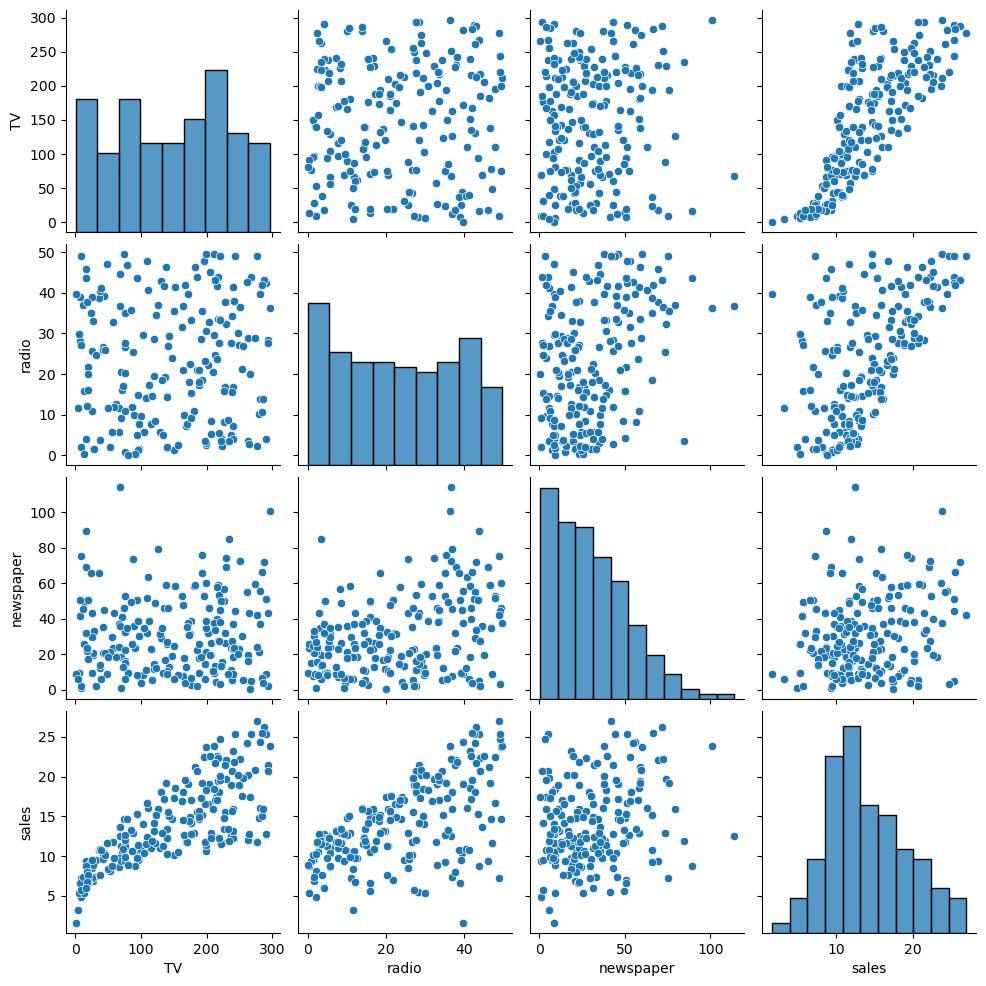

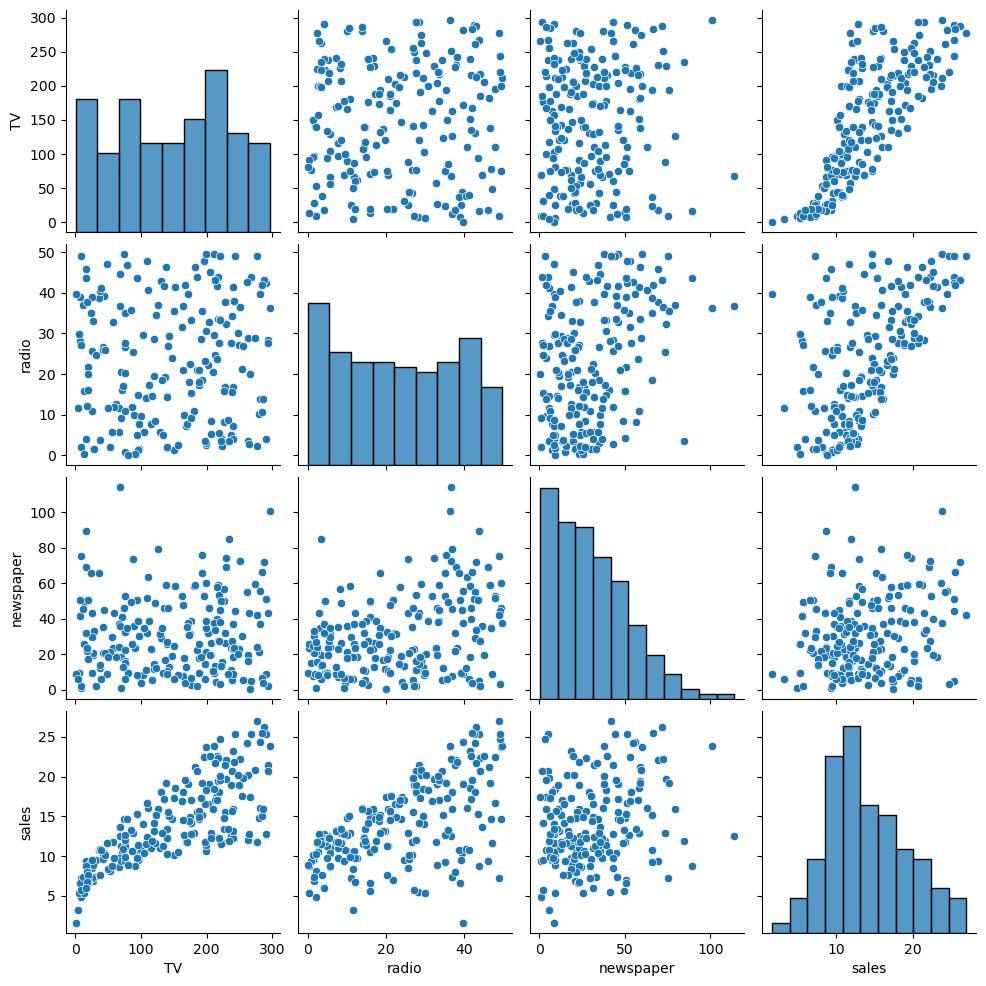

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


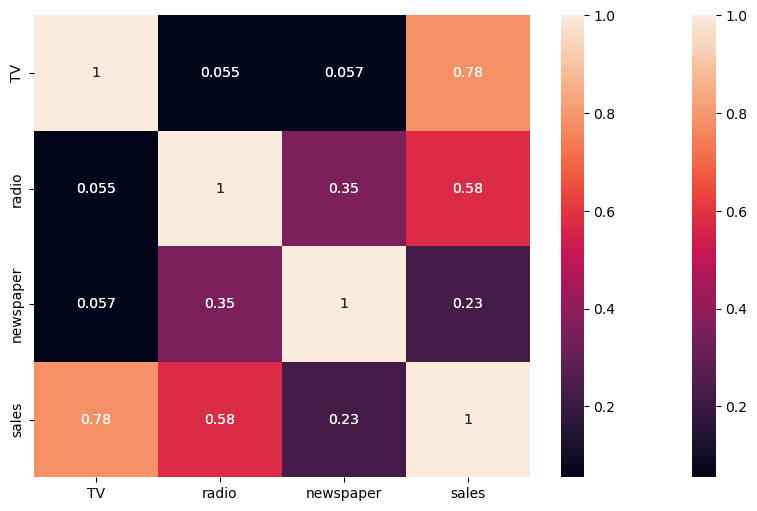

In [16]:
sns.heatmap(df.corr(),annot = True)
plt.show()

## Train-Test Split

In [14]:
# pip install scikit-learn

In [21]:
X = df.drop(columns = "sales") #df["TV", "radio", "newspaper"]
y = df["sales"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [25]:
df.sample(15)

,TV,radio,newspaper,sales
90,134.3,4.9,9.3,11.2
70,199.1,30.6,38.7,18.3
162,188.4,18.1,25.6,14.9
83,68.4,44.5,35.6,13.6
91,28.6,1.5,33.0,7.3
150,280.7,13.9,37.0,16.1
135,48.3,47.0,8.5,11.6
141,193.7,35.4,75.6,19.2
96,197.6,3.5,5.9,11.7
136,25.6,39.0,9.3,9.5


In [26]:
print("Train features shape : ", X_train.shape)
print("Train target shape : ", y_train.shape)
print("Test features shape : ", X_test.shape)
print("Test target shape : ", y_test.shape)

Train features shape :  (134, 3)
Train target shape :  (134,)
Test features shape :  (66, 3)
Test target shape :  (66,)


In [28]:
X_train

,TV,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


## Model Fitting and Compare Actual and Predicted Labels

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [33]:
my_dict = {"Actual":y_test, "Pred": y_pred, "Residual":y_test-y_pred}


In [35]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.586731,0.313269
15,22.4,21.186225,1.213775
30,21.4,21.667530,-0.267530
158,7.3,10.810865,-3.510865
128,24.7,22.252109,2.447891
...,...,...,...
97,15.5,15.279520,0.220480
31,11.9,11.456598,0.443402
12,9.2,11.123119,-1.923119
35,12.8,16.600038,-3.800038


In [37]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.586731,0.313269
15,22.4,21.186225,1.213775
30,21.4,21.667530,-0.267530
158,7.3,10.810865,-3.510865
128,24.7,22.252109,2.447891
115,12.6,13.314595,-0.714595
69,22.3,21.238753,1.061247
170,8.4,7.384005,1.015995
174,11.5,13.439711,-1.939711
45,14.9,15.194454,-0.294454


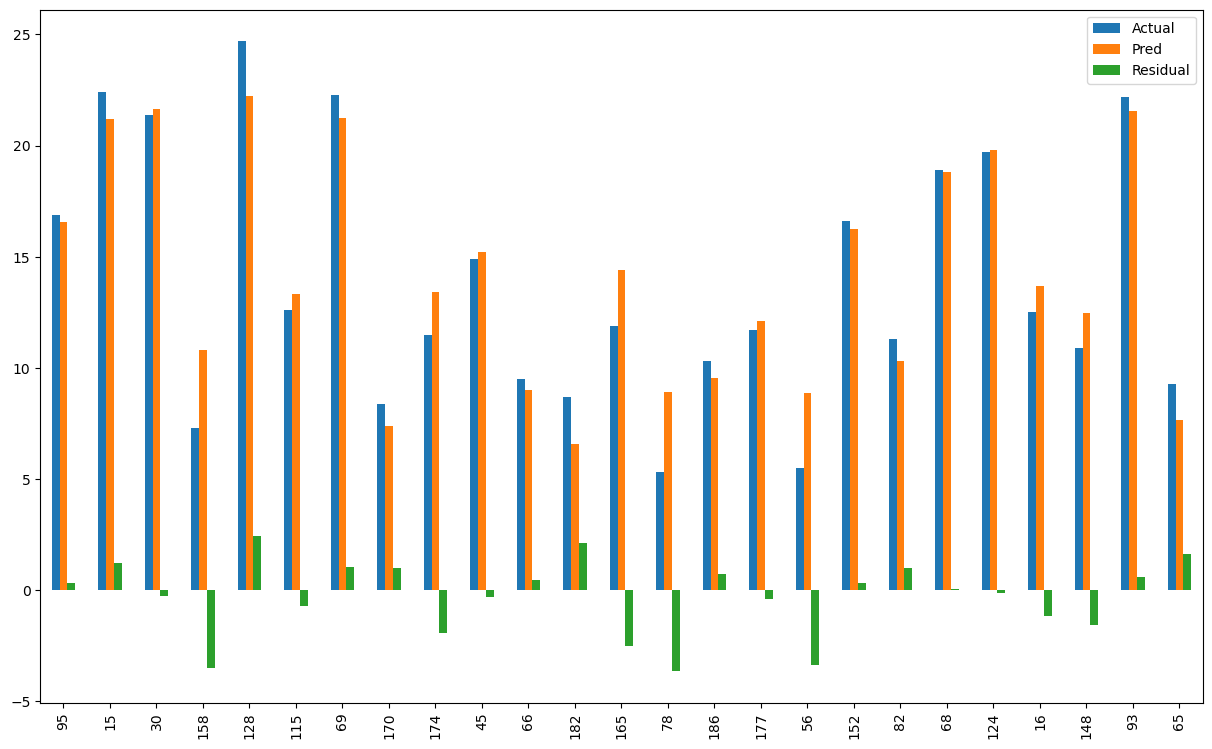

In [38]:
result_sample.plot(kind = "bar", figsize = (15,9))
plt.show()

## Error Metrics

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
R2_score = r2_score(y_test, y_pred) # Elimdeki veriler doğru tahmin yapabilmek için %86 oranında yeterli.# Elimdeki veriler doğru tahmin yapabilmek için %86 oranında yeterli. %14 lük kısım benim elimde olmayan feature lardan kaynaklanıyor. Belki evde altından musluklar vardır.
R2_score

0.8555568430680086

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.4937750024728973

In [42]:
mse = mean_squared_error(y_test, y_pred)
mse

3.7279283306815105

In [43]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


1.9307843822347204

In [45]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [46]:
mae / sales_mean

0.10652701033859134

In [47]:
rmse / sales_mean # minimize etmeye gerek var. Bize ciddi hataların olduğunu gösteririr ve hangi modeli seçeceğimize karar verir.

0.13769187963877483

## What is the concept of punishment for RMSE error metric?

In [61]:
variables = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3200]}

In [62]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200


In [63]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [64]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200


In [65]:
#mae
df_2.residual.sum()/3

166.66666666666666

In [60]:
# rmse
((df_2.residual**2).sum()/3)**0.5 

369.68455021364724

In [ ]:
#mea ile rmse birbirine yakın ise modelinizin errrorlerinde  outlier bir değer yoktur şeklinde yorum yapabiliriz.

## Evaluation Model

In [66]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [67]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8555568430680086
MAE 		: 1.4937750024728973
MSE 		: 3.7279283306815105
RMSE 		: 1.9307843822347204


In [68]:
y_train_pred = model.predict(X_train)

In [69]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9095216639030753
MAE 		: 1.130887842871626
MSE 		: 2.410858654557854
RMSE 		: 1.5526939990087725


In [ ]:
## Modeli değerlendiriken Test setinden aldığımız değer ile Train setinden aldığımız değerleri kıyaslıyoruz
# Bu değerler ne kadar yakınsa başarı oranı o kadar iyidir
# Train setindeki scorelar genellikle daha iyi çıkar. Çünkü model bu veri üzerinde eğitiliyor

In [ ]:
#y_train skorlarının daha iyi çıkması beklenir. çünkü train yaparken bu datayı kullandığı için bu veriler üzerinde eğitim yaptığı için bu verileri gördü.
#fakat ben görmediğim veriler üzerinde de modelimden iyi skorlar alabiliyorum.
#burada modelimin test datası ile yaptığımda elde ettiğim skor, train data ile yaptığıma yakın olduğu için optimal bir başarıyı yakaladık diyebiliriz. 
#Yani test setinden aldığım değer train setinden aldığımız değeri kıyaslıyoruz. bu değerler ne kadar yakınsa modelimin başarı oranı o kadar iyidir.

## Is data suitable for linear regression?

## Plotting residuals

In [70]:
residuals = y_test - y_pred

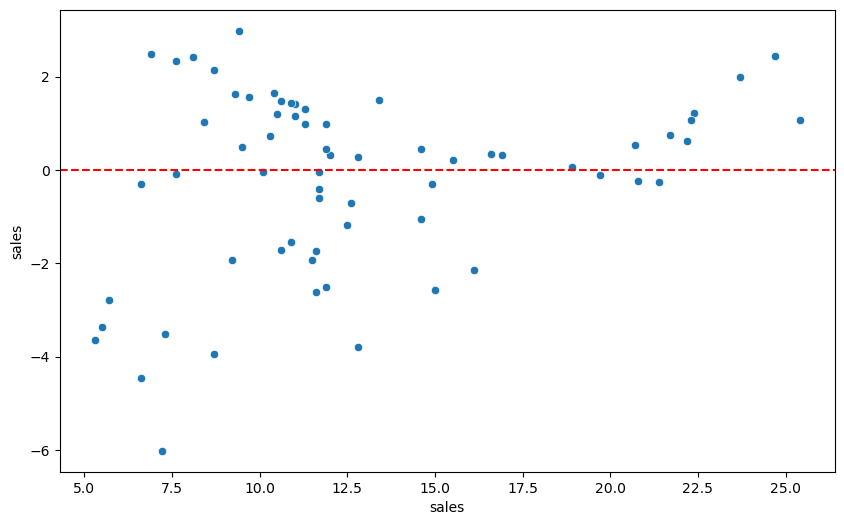

In [71]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

In [ ]:
# Benim residual değerlerim kırmızı çizginin etrafında ne kadar simetrik veya normal dağılmışsa
# Yani linearity ne kadar fazla ise veri linear modele o kadar uygundur

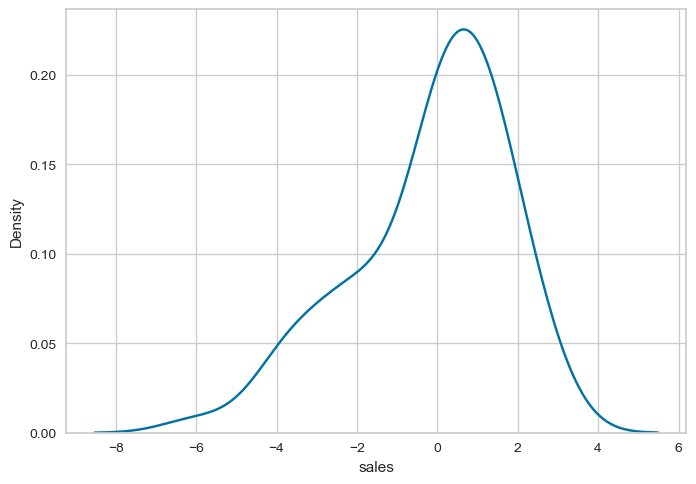

In [81]:
sns.kdeplot(residuals)
plt.show()


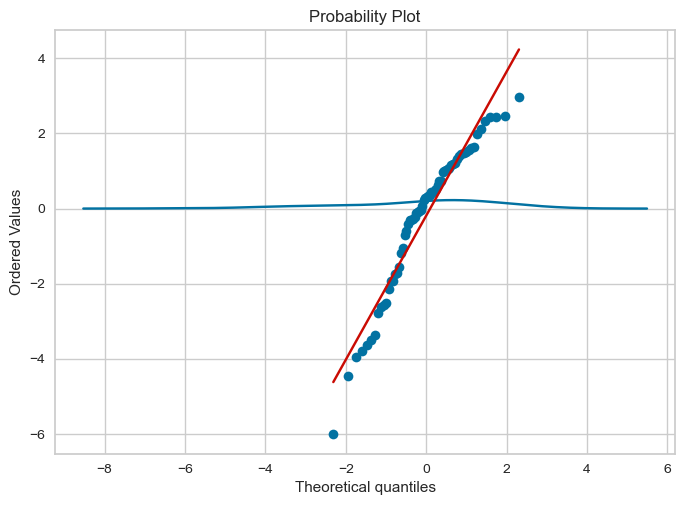

In [80]:
stats.probplot(residuals, dist="norm", plot=plt);
plt.show()

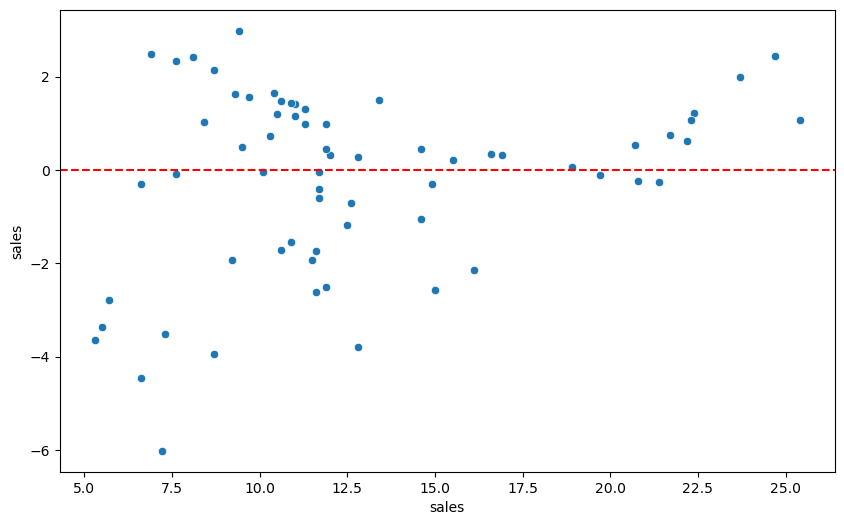

In [76]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()



In [82]:
skew(residuals)

-0.8262236558154477

In [77]:
# pip install yellowbrick
!pip install yellowbrick

     |████████████████████████████████| 271 kB 934 kB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 6.1 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


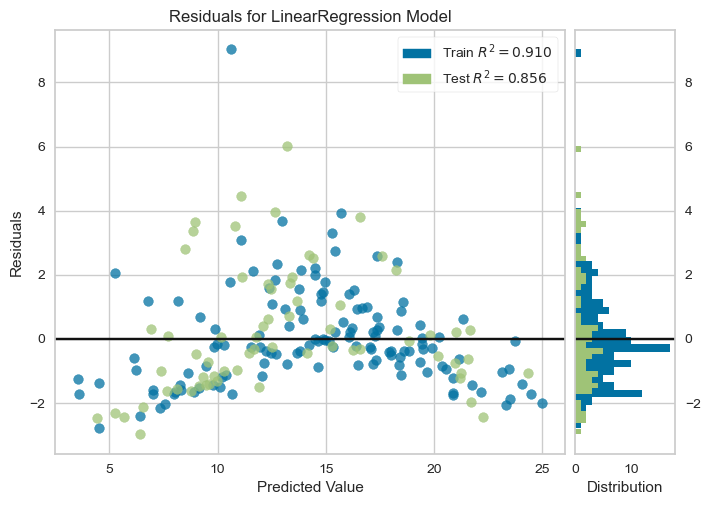

In [78]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

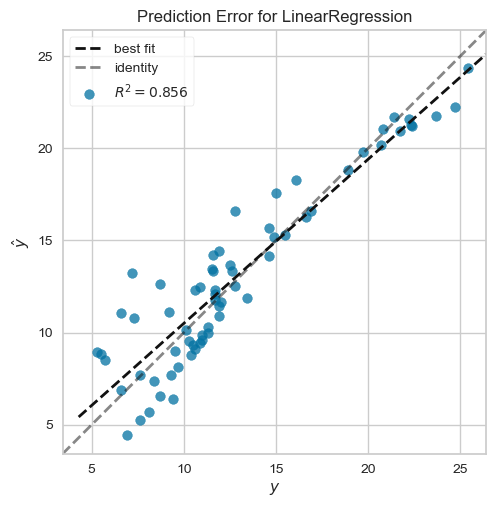

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [83]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Retraining Model on Full Data

In [84]:
final_model = LinearRegression()

In [85]:
final_model.fit(X,y)

LinearRegression()

## Coefficients

## Prediction on New Data

## Feature importance (The effect of features on the predicted label)